In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats


import seaborn as sns
import matplotlib.pylab as plt

In [425]:
data = pd.read_csv('Music Data Sets/data.csv')
data.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


In [426]:
# create a narrowed data set from the original data set

mydf = pd.DataFrame({'duration_ms': data['duration_ms'], 'popularity': data['popularity'], 'year': data['year']})
mydf_19 = mydf.loc[mydf['year'] == 2019]
mydf_72 = mydf.loc[mydf['year'] == 1972]

In [427]:
mydf = pd.concat([mydf_19, mydf_72]).reset_index().drop('index', axis=1)
mydf

,duration_ms,popularity,year
0,179908,72,2019
1,247500,67,2019
2,181120,71,2019
3,216067,81,2019
4,224063,65,2019
...,...,...,...
3995,241293,35,1972
3996,190667,36,1972
3997,215867,27,1972
3998,193320,31,1972


In [428]:
mydf.corr()

,duration_ms,popularity,year
duration_ms,1.000000,-0.223035,-0.232424
popularity,-0.223035,1.000000,0.887124
year,-0.232424,0.887124,1.000000


In [454]:
# random sample size n = 100

sample19 = mydf_19.sample(n=100)
sample72 = mydf_72.sample(n=100)

In [455]:
dur19 = sample19['duration_ms']
pop19 = sample19['popularity']

dur72 = sample72['duration_ms']
pop72 = sample72['popularity']

In [575]:
# distribution of samples
# 2019 duration

# calculate number of bins

num_bins = int(np.ceil(np.sqrt(dur19.count())))
num_bins

10

In [607]:
bin_pop = pd.cut(dur19, num_bins)
bin_pop_freq = bin_pop.value_counts()
bin_pop.name = 'binnedPopulation'
dur19_df = pd.concat([dur19, bin_pop], axis=1)
#dur19_df

In [608]:
# create frequency table

total = dur19_df['duration_ms'].count()
groups = []

for group, subset in dur19_df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange': group,
        'Freq': len(subset),
        'Rel-Freq': len(subset)/total
    })
    
freq_table = pd.DataFrame(groups)
#print (freq_table)

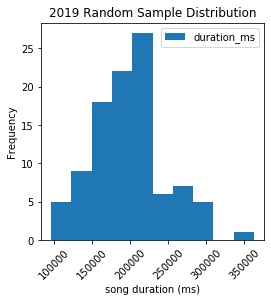

In [609]:
ax = dur19_df.plot.hist(figsize=(4, 4), bins=num_bins, rot='45')
ax.set_xlabel('song duration (ms)')
ax.set_title('2019 Random Sample Distribution')
plt.show()

In [611]:
# 2019 popularity

bin_pop = pd.cut(pop19, num_bins)
bin_pop_freq = bin_pop.value_counts()
bin_pop.name = 'binnedPopulation'
pop19_df = pd.concat([pop19, bin_pop], axis=1)
#pop19_df

In [613]:
# create frequency table

total = pop19_df['popularity'].count()
groups = []

for group, subset in pop19_df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange': group,
        'Freq': len(subset),
        'Rel-Freq': len(subset)/total
    })
    
freq_table = pd.DataFrame(groups)
#print (freq_table)

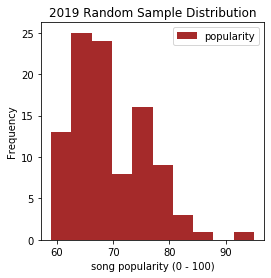

In [688]:
ax = pop19_df.plot.hist(figsize=(4, 4), bins=num_bins, color='brown')
ax.set_xlabel('song popularity (0 - 100)')
ax.set_title('2019 Random Sample Distribution')
plt.show()

In [617]:
# 1972 song duration

bin_pop = pd.cut(dur72, num_bins)
bin_pop_freq = bin_pop.value_counts()
bin_pop.name = 'binnedPopulation'
dur72_df = pd.concat([dur72, bin_pop], axis=1)

total = dur72_df['duration_ms'].count()
groups = []

for group, subset in dur72_df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange': group,
        'Freq': len(subset),
        'Rel-Freq': len(subset)/total
    })
    
freq_table = pd.DataFrame(groups)
#print (freq_table)

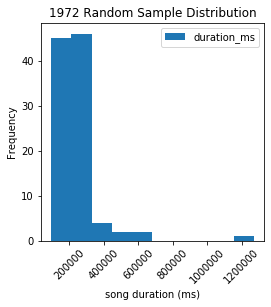

In [619]:
ax = dur72_df.plot.hist(figsize=(4, 4), bins=num_bins, rot='45')
ax.set_xlabel('song duration (ms)')
ax.set_title('1972 Random Sample Distribution')
plt.show()

In [628]:
# 1972 song popularity

bin_pop = pd.cut(pop72, num_bins)
bin_pop_freq = bin_pop.value_counts()
bin_pop.name = 'binnedPopulation'
pop72_df = pd.concat([pop72, bin_pop], axis=1)

total = pop72_df['popularity'].count()
groups = []

for group, subset in pop72_df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange': group,
        'Freq': len(subset),
        'Rel-Freq': len(subset)/total
    })
    
freq_table = pd.DataFrame(groups)
#print (freq_table)

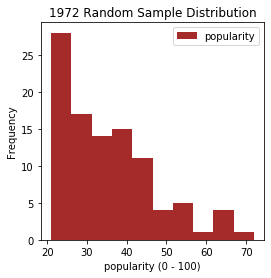

In [689]:
ax = pop72_df.plot.hist(figsize=(4, 4), bins=num_bins, color='brown')
ax.set_xlabel('popularity (0 - 100)')
ax.set_title('1972 Random Sample Distribution')
plt.show()

In [652]:
# create a bar chart with error bars

bar_df19 = pd.DataFrame(sample19)
bar_df72 = pd.DataFrame(sample72)

dur19mean = bar_df19['duration_ms'].mean()
dur19std = bar_df19['duration_ms'].std()
pop19mean = bar_df19['popularity'].mean()
pop19std = bar_df19['popularity'].std()

dur72mean = bar_df72['duration_ms'].mean()
dur72std = bar_df72['duration_ms'].std()
pop72mean = bar_df72['popularity'].mean()
pop72std = bar_df72['popularity'].std()

pop72mean

35.67

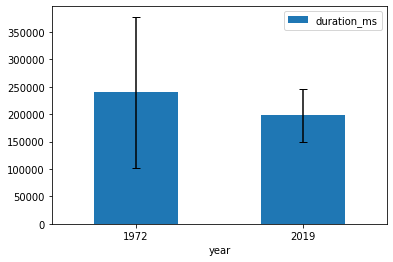

In [674]:
bar_dur_df = pd.concat([sample19, sample72]).drop('popularity', axis=1).groupby(by=['year'])
means = bar_dur_df.mean()
err = bar_dur_df.std()
fig, ax = plt.subplots()
means.plot.bar(yerr=err, ax=ax, capsize=4, rot=0)

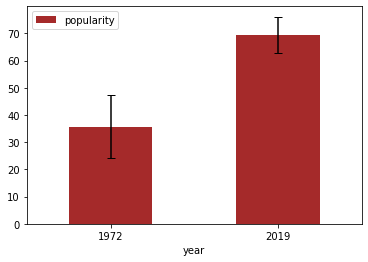

In [687]:
bar_pop_df = pd.concat([sample19, sample72]).drop('duration_ms', axis=1).groupby(by=['year'])
means = bar_pop_df.mean()
err = bar_pop_df.std()
fig, ax = plt.subplots()
means.plot.bar(yerr=err, ax=ax, capsize=4, rot=0, color='brown')

In [700]:
# hypothesis test for mu2 < mu1 (duration)

n1 = len(dur19)
x1_bar = np.mean(dur19)
s1 = np.std(dur19, ddof=1)

n2 = len(dur72)
x2_bar = np.mean(dur72)
s2 = np.std(dur72, ddof=1)

alpha = 0.01

t = (x1_bar - x2_bar) / np.sqrt(s1**2 / n1 + s2**2 / n2)

print(t, x1_bar, s1, n1, x2_bar, s2, n2)

-2.9182319645204005 197759.21 48103.65213046499 100 240297.74 137602.30641144753 100


In [3]:
#df = min(n1-1, n2-1)

p_val = stats.t.cdf(-2.9182319645204005, 99) #left-tail
#p_val = stats.t.sf(-2.9182319645204005, 99) #right-tail
#p_val = stats.t.cdf(-2.9182319645204005, 99) * 2 #two-tailed
p_val
#print(f'{round(p_val, 4)}, {p_val < alpha}: We can reject the null hypothesis that the average song duration is not the same in 1999 as it was in 2019, and we can further accept the alternate hypothesis that song duration is longer in 2019 than in 1999.')

0.00217854410692308

In [9]:
# confidence interval

c = 0.85
alpha = (1 - c) / 2
df = n1 - 1
t_c = round(abs(stats.t.ppf(q=alpha, df=df)), 2)
E = t_c * np.sqrt((s1 ** 2 /n1) + (s2 ** 2 /n2))
conf = round((x1_bar - x2_bar) - E, 2), round((x1_bar - x2_bar) + E, 2)

print(f'99% confidence interval = {conf}')
print('the confidence interval is negative, therefore mu1 (song duration in 2019) < mu2 (song duration in 1999)')
print(f'the difference in avg song duration btw 2019 and 1972 is between {conf} ms, or {round(conf[0]/1000, 2)} to {round(conf[1]/1000, 2)} seconds')

NameError: name 'n1' is not defined

In [703]:
t_c, E

(1.45, 21136.383005158743)

In [704]:
# 2019 duration_ms x popularity correlation

slope, intercept, r_val, p_val, std_err = stats.linregress(dur19, pop19)

print(f'y_hat = {round(intercept, 2)} + {round(slope, 2)}x')
print(slope, intercept, r_val, p_val, std_err)

y_hat = 69.91 + -0.0x
-2.3916799446920865e-06 69.91297673643516 -0.01715882226953091 0.8654478949980553 1.4077923634817959e-05


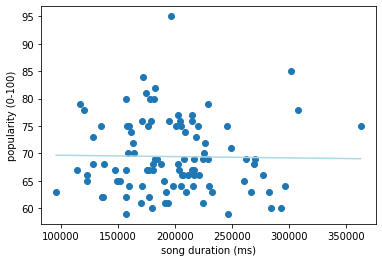

In [705]:
prediction_x = np.linspace(dur19.min(), dur19.max())
prediction_y = prediction_x * slope + intercept

plt.scatter(dur19, pop19)
plt.plot(prediction_x, prediction_y, color='lightblue')
plt.xlabel('song duration (ms)')
plt.ylabel('popularity (0-100)')
plt.show()

In [464]:
r_sq = r_val**2

print(f'r_sq: {round(r_sq, 4)}\nexplained variation: {round(r_sq*100, 2)}%\nunexplained variation: {round(100 - (r_sq*100), 2)}%')

r_sq: 0.0003
explained variation: 0.03%
unexplained variation: 99.97%


In [465]:
p_val = stats.linregress(dur19, pop19).pvalue

print(f'The P-value {round(p_val, 3)} > alpha 0.05, therefore with a 5% level of significance, we cannot reject the null \n\
hypothesis.')

The P-value 0.865 > alpha 0.05, therefore with a 5% level of significance, we cannot reject the null 
hypothesis.


In [498]:
alpha = 0.01
r = r_val
n = 100

t = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
df = n - 2

p_val = stats.t.cdf(t, df) #left-tail
#p_val = stats.t.sf(t, df) #right-tail
#p_val = stats.t.cdf(t, df) * 2 #two-tailed

print(t, p_val, p_val < alpha, ': We cannot reject the null hypothesis that the population correlation coefficient rho is 0')

0.7463795057056171 0.7713875158173079 False : We cannot reject the null hypothesis that the population correlation coefficient rho is 0


In [549]:
def std_err (x,y):
    slope = stats.linregress(x,y).slope
    intercept = stats.linregress(x,y).intercept
    y_hat = slope * x + intercept
    SE = np.sqrt(((y-y_hat)**2).sum()/(len(y)-2))
    return SE

In [551]:
def margin_y(x,y,c,x_value):
    n = len(x)
    x_bar = x.mean()
    t_c = abs (stats.t.ppf(q=(1-c)/2, df=n-2))
    S_e = std_err(x,y)
    x_sum = x.sum()
    x_sqsum = (x**2).sum()  
    E = t_c*S_e*np.sqrt(1 + 1/n + n*((x_value-x_bar)**2)/(n*x_sqsum-x_sum**2))
    y_hat = stats.linregress(x,y).slope *x_value + stats.linregress(x,y).intercept
    beta_lower = y_hat-E
    beta_upper = y_hat+E
    return (round(beta_lower, 4), round(beta_upper, 4))

In [554]:
x_value = 180000 # 3 minute song
c = 0.85
conf = margin_y(dur19, pop19, c, x_value)

print(f'There is 85% confidence that a 3 minute song (180,000 ms) released in 2019 will have a popularity rating between \n{conf}')

There is 85% confidence that a 3 minute song (180,000 ms) released in 2019 will have a popularity rating between 
(59.6508, 79.3142)


In [534]:
print(f'The P-value {round(p_val, 2)} > alpha 0.05, therefore with a 5% level of significance we cannot reject the null hypothesis.')

The P-value 0.46 > alpha 0.05, therefore with a 5% level of significance we cannot reject the null hypothesis.


In [535]:
def margin_beta(x,y,c):
    n = len(x)
    t_c = abs (stats.t.ppf(q=(1-c)/2, df=n-2))
    S_e = std_err(x,y)
    E = t_c*S_e/(np.sqrt((x**2).sum() - (x.sum())**2/n))
    slope = stats.linregress(x,y).slope
    beta_lower = slope-E
    beta_upper = slope+E
    
    return (beta_lower,beta_upper)

In [536]:
c = 0.99
conf = margin_beta(dur19, pop19, c)
print(f'{conf} interval is negative and positive, therefore we cannot condclude there is linear correlation between song duration and popularity in 2019.')

(-3.937341529141267e-05, 3.45900554020285e-05) interval is negative and positive, therefore we cannot condclude there is linear correlation between song duration and popularity in 2019.


--


In [537]:
# 1972 duration_ms x popularity correlation

slope, intercept, r_val, p_val, std_err = stats.linregress(dur72, pop72)

print(f'y_hat = {round(intercept, 2)} + {round(slope, 2)}x')
print(slope, intercept, r_val, p_val, std_err)

y_hat = 34.14 + 0.0x
6.362315876553579e-06 34.141149873698055 0.07518233100186894 0.4572249683653842 8.524237104472385e-06


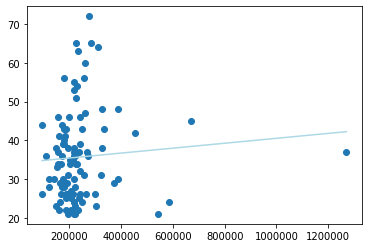

In [538]:
prediction_x = np.linspace(dur72.min(), dur72.max())
prediction_y = prediction_x * slope + intercept

plt.scatter(dur72, pop72)
plt.plot(prediction_x, prediction_y, color='lightblue')
plt.show()

In [539]:
r_sq = r_val**2

print(f'r_sq: {round(r_sq, 4)}\nexplained variation: {round(r_sq*100, 2)}%\nunexplained variation: {round(100 - (r_sq*100), 2)}%')

r_sq: 0.0057
explained variation: 0.57%
unexplained variation: 99.43%


In [540]:
p_val = stats.linregress(dur72, pop72).pvalue

print(f'The P-value {round(p_val, 3)} > alpha 0.05, therefore with a 5% level of significance, we cannot reject the null \n\
hypothesis.')

The P-value 0.457 > alpha 0.05, therefore with a 5% level of significance, we cannot reject the null 
hypothesis.


In [553]:
x_value = 180000 # 3 minute song
c = 0.85
conf = margin_y(dur72, pop72, c, x_value)

print(f'There is 85% confidence that a 3 minute song (180,000 ms) released in 1972 will have a popularity rating between \n{conf}')

There is 85% confidence that a 3 minute song (180,000 ms) released in 1972 will have a popularity rating between 
(18.2524, 52.3203)


In [632]:
print(x1_bar, s1, x2_bar, s2)

197759.21 48103.65213046499 240297.74 137602.30641144753
